<a href="https://colab.research.google.com/github/Minwoohh/DALC_Scala/blob/main/7%EC%A3%BC%EC%B0%A8__%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn

*   데이터를 데이터 테이블 관점으로 이해한다.
    기본 테이블은 엑셀의 시트와 동일한 구조이다.
*   행 : 개체
*   열: 개별요소의 특징을 나타내는 변수



# 붓꽃 데이터 세트
* 행: 꽃 한 개체
* head() : 괄호안의 숫자는 노출되는 데이터 수
* 열의 마지막 : 꽃의 품종

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(4)

# Scikit Learn API 사용단계
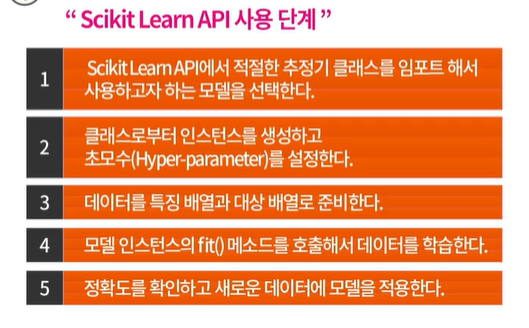

# 선형 회귀과정 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# 특징변수 = x , 대상변수 = y
rng=np.random.RandomState(42)
x = 10 *rng.rand(50) # 0과 1사이의 난수를 ( 50개 생성) * 10 = 0과 10사이에 난수를 50개 생성
y = 2* x - 1 + rng.randn(50) # 난수를 더해서 변동이 발생하도록 함
plt.scatter(x,y);
# y = ax + b꼴

# 회귀 분석 과정
* 모델 클래스 선택

In [ ]:
from sklearn.linear_model import LinearRegression #선형회귀 클래스를 임포트하기

* 모델 초모수 선택

    절편 사용 여부 결정: (fit_intercept=True)에서 True 를 사용하면 된다.





In [ ]:
model = LinearRegression(fit_intercept=True)

* 데이터 차원 변경

    Scikit - Learn에서 특징행렬은 2차원, 대상행렬은 1차원으로 표시된다.
    넘파이 기능을 사용하여 1차원 > 2차원으로 변경 ( 2가지 방법이 있다.)


In [ ]:
X = x[:, np.newaxis] #np.newaxis 방법
X.shape

#X = x.reshape(50,1)
#X.shape

* 모델에 데이터 적용방법

In [ ]:
model.fit(X,y) #fit() 명령어에는 계산결과가 모델 인스턴스 속성에 저장됨

* 모델 확인 방법
   
    = 모델 속성값 확인



In [ ]:
print(model.coef_) #기울기의 모수
print(model.intercept_) #절편값의 모수

* 모델의 정확도를 확인하는 방법

In [ ]:
model.score(X,y) #1에 가까울 수록 정확도가 높다

* 모델의 시각화

     모델을 추가해보기

In [ ]:
xfit=np.linspace(-1,11)
plt.scatter(x,y)
plt.plot(xfit,model.coef_ * xfit + model.intercept_,'r')

# 정확도를 위한 성과 개선 방법

1.   최적의 모덱 선택하기 = "편향 - 분산 트레이드 오프"에서 효율적인 점을 찾기
    
    빨간색점: 훈련 데이터에서 생략된 점
   
    R^2 값: 회귀 모델의 정확도 = 결정계수 / 점수

    검정 : 새로운 데이터에 대해 모델이 정확한지 따지는 과정 = 빨간 점에 대해 모델이 우수하다 = 검정결과가 우수하다



# 다항식 회귀 모델
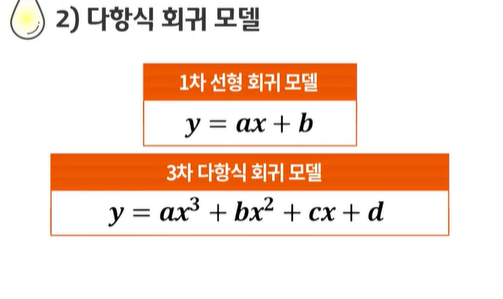

 * 1차식에서 모델 모수 a,b
 * 3차식에서 모델 모수 a,b,c,d

* 다항식 전처리 프로그램과 선형 회귀 모델을 하나로 묶는 파이프라인을 사용

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **Kwargs):
 return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

* 다항식 회귀 모델에 사용할 데이터 생성

In [ ]:
import numpy as np

def make_data(N, err= 1.0, rseed = 1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N)**2
    y = 10 -1./(X + 0.1)
    if err >0:
        y += err* rng.randn(N)
        return X,y
X,y = make_data(40)       

* 데이터를 시각화

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1,1.1,500)
plt.scatter(X,y,color='black') axis = plt.axis()

* 차수를 1차부터 10차까지 증가시키면서 훈련점수와 검증 점수를 그래프에 표시 하여 알맞은 차수 찾기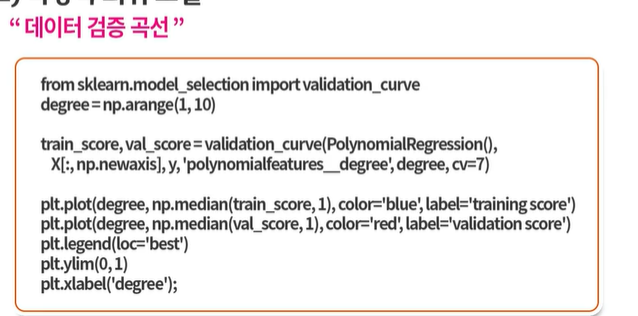